In [5]:
import math
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted).
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

<ipython-input-12-053fdde5fc0b>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


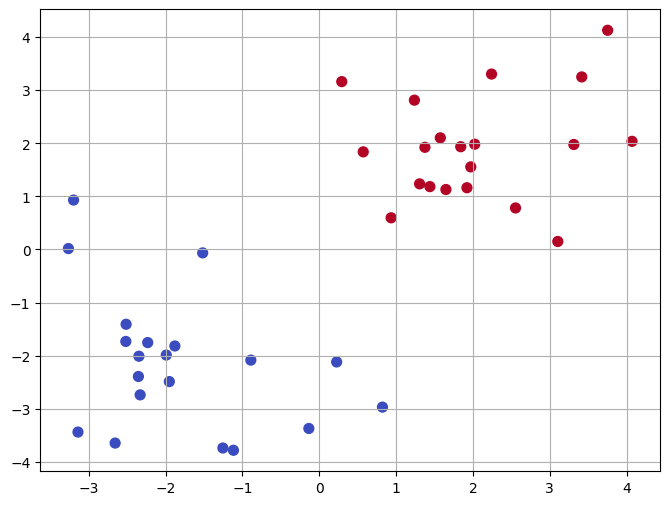

In [12]:
#Data
data1=pd.read_csv('/dataset1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
rcParams['figure.figsize'] = 8, 6
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#### Solution:

1.
(a).

In [13]:
svm = SVC(kernel='linear', C=100000)
svm.fit(X, Y)

SVC(C=100000, kernel='linear')

In [14]:
weights = svm.coef_[0]
bias = svm.intercept_[0]

hyperplane_equation = f"{weights[0]:.3f} * feature_1 + {weights[1]:.3f} * feature_2 + {bias:.3f} = 0"
hyperplane_equation



'0.663 * feature_1 + 0.564 * feature_2 + 0.043 = 0'

(b).

In [15]:
magnitude_of_weights = np.linalg.norm(weights)
margin_of_separation = 2 / magnitude_of_weights
margin_of_separation

2.2977993504276433

(c).

In [16]:
sv_vectors = svm.support_vectors_
sv_vectors

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

2.Plot

<ipython-input-17-cd06be38cfca>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


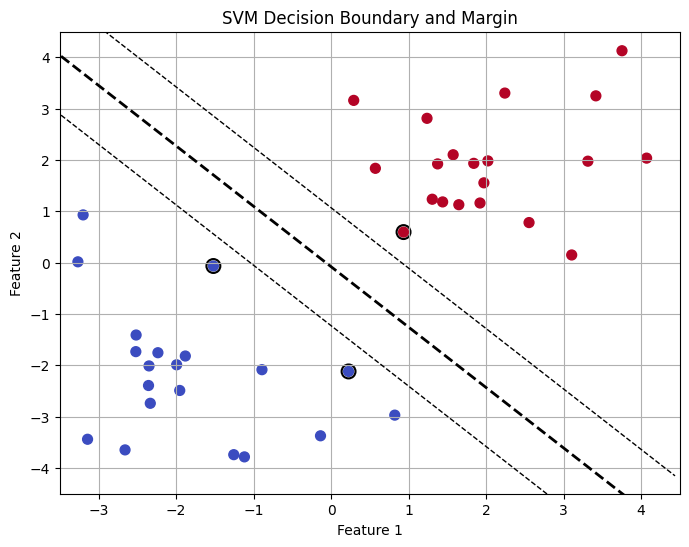

In [17]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

x_min, x_max = plt.xlim()
x_range = np.array([x_min, x_max])
y_range = -(weights[0] * x_range + bias) / weights[1]
plt.plot(x_range, y_range, 'k--', linewidth=2)

y_range_margin_pos = y_range + np.sign(weights[1]) * (margin_of_separation / 2)
y_range_margin_neg = y_range - np.sign(weights[1]) * (margin_of_separation / 2)
plt.plot(x_range, y_range_margin_pos, 'k--', linewidth=1)
plt.plot(x_range, y_range_margin_neg, 'k--', linewidth=1)

plt.scatter(sv_vectors[:, 0], sv_vectors[:, 1], s=100, facecolors='none', edgecolors='k', linewidth=1.5)

plt.title('SVM Decision Boundary and Margin')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(-3.5, 4.5)
plt.ylim(-4.5, 4.5)
plt.show()


### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


<ipython-input-18-c715022eeaa8>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


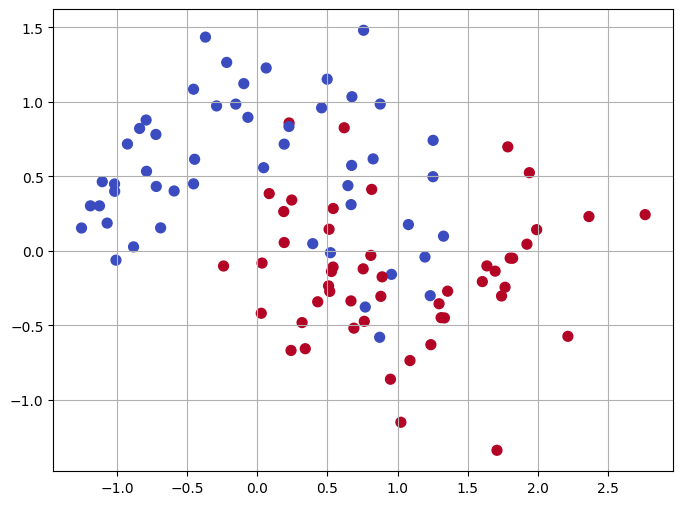

In [18]:
#Data
data2=pd.read_csv('/dataset2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions:

(1)

<ipython-input-19-3769bb785336>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], s=50, c=Y_train_1, cmap=plt.cm.get_cmap('coolwarm', 2))


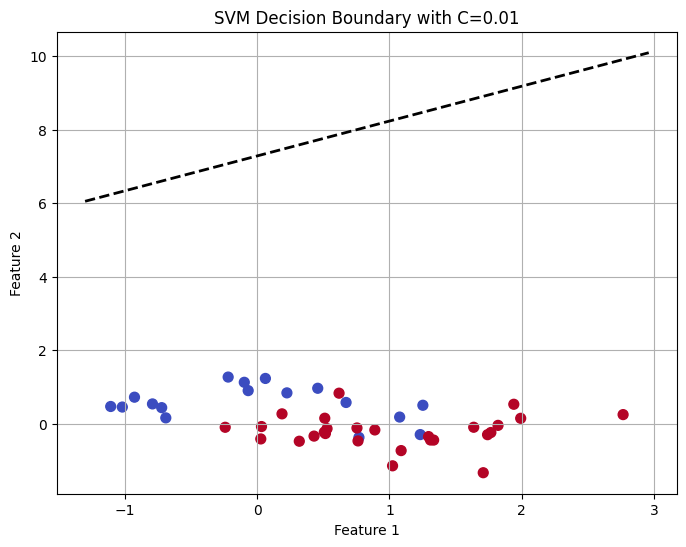

(0.6136363636363636, 0.3939393939393939)

In [19]:
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train_1, Y_train_1)

train_predictions = svm_model.predict(X_train_1)
train_accuracy = accuracy_score(Y_train_1, train_predictions)

test_predictions = svm_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)

plt.figure(figsize=(8, 6))
plt.grid()
plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], s=50, c=Y_train_1, cmap=plt.cm.get_cmap('coolwarm', 2))

x_min, x_max = plt.xlim()
x_vals = np.array([x_min, x_max])
weights = svm_model.coef_[0]
bias = svm_model.intercept_[0]
y_vals = -(weights[0] * x_vals + bias) / weights[1]
plt.plot(x_vals, y_vals, 'k--', linewidth=2)

plt.title('SVM Decision Boundary with C=0.01')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

train_accuracy, test_accuracy


(2)

#### (For this question people could have different C. Any C that is bigger than 1, is a safe choice. But the corresponding accuracy should be around 0.78.)

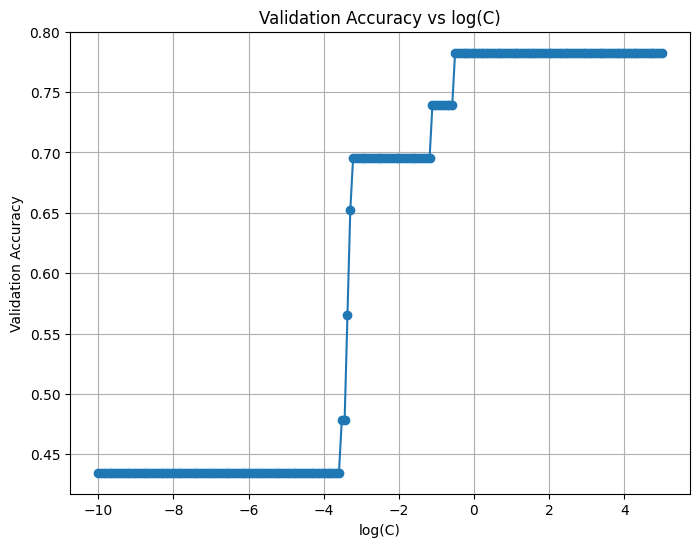

In [20]:
C_range = [math.exp(i) for i in np.linspace(-10, 5, 200)]
accuracies = []

for value in C_range:
    model = SVC(kernel='linear', C=value)
    model.fit(X_train_1, Y_train_1)
    predictions = model.predict(X_vali)
    accuracies.append(accuracy_score(Y_vali, predictions))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.log(C_range), accuracies, marker='o')
ax.set_xlabel('log(C)')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Accuracy vs log(C)')
ax.grid(True)
plt.show()


(3)

#### (The answer could be different for people who have different optimal C. However it should be around 80 percent.)

In [21]:
best_C_index = np.argmax(accuracies)
best_C_value = C_range[best_C_index]

svm_best = SVC(kernel='linear', C=best_C_value)
svm_best.fit(X_train_1, Y_train_1)

predictions_optimal = svm_best.predict(X_test)
test_accuracy_optimal = accuracy_score(Y_test, predictions_optimal)

best_C_value, test_accuracy_optimal


(0.6050086262345171, 0.8181818181818182)

### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected.


<ipython-input-6-431c491e5faa>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


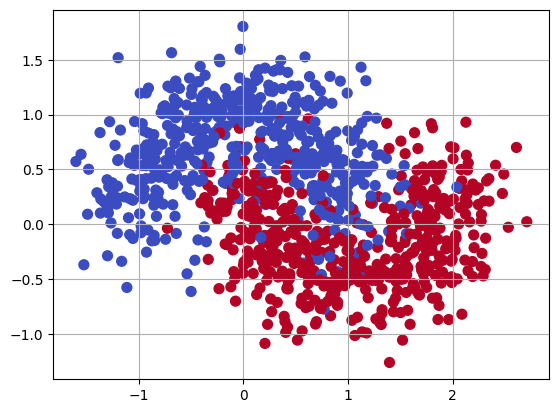

In [6]:
#Data
data3=pd.read_csv('/dataset3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions

(1)

<ipython-input-7-f80ad5224548>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], s=50, c=Y_train_1, cmap=plt.cm.get_cmap('coolwarm', 2))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


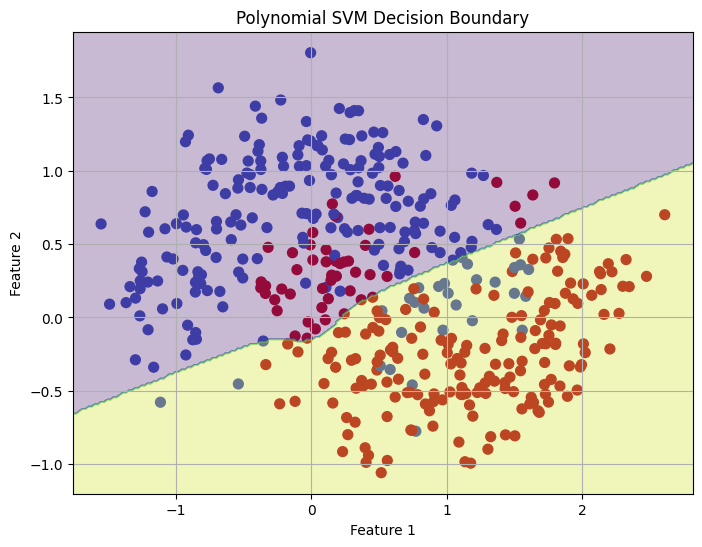

(0.8258928571428571, 0.8545454545454545)

In [7]:
poly_svm = SVC(kernel='poly')
poly_svm.fit(X_train_1, Y_train_1)

train_preds = poly_svm.predict(X_train_1)
train_acc = accuracy_score(Y_train_1, train_preds)

test_preds = poly_svm.predict(X_test)
test_acc = accuracy_score(Y_test, test_preds)

plt.figure(figsize=(8, 6))
plt.grid()
plt.scatter(X_train_1.iloc[:, 0], X_train_1.iloc[:, 1], s=50, c=Y_train_1, cmap=plt.cm.get_cmap('coolwarm', 2))

x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

pred_grid = poly_svm.predict(np.c_[grid_x.ravel(), grid_y.ravel()])
pred_grid = pred_grid.reshape(grid_x.shape)
plt.contourf(grid_x, grid_y, pred_grid, alpha=0.3)

plt.title('Polynomial SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

train_acc, test_acc


(2)
a.

#### Look carefully at the plot. Here the accuracy goes down when we increase log(C). If you choose optimal C in the end of the period when C reaches max as we did in class, you could have problems (might not, no garuantee). So you might have your own way of picking the optimal C, but you should have a similar OS result in next question.

In [8]:
degree_options = [1, 2, 3, 4]
highest_accuracy = 0
best_degree = 0
best_C_value = 0

for degree in degree_options:
    C_range = [math.exp(i) for i in np.linspace(-10, 2 * degree, 200)]
    highest_val_accuracy = 0
    best_C_for_degree = 0

    for C_param in C_range:
        model_poly = SVC(kernel='poly', degree=degree, C=C_param)
        model_poly.fit(X_train_1, Y_train_1)
        predictions_val = model_poly.predict(X_vali)
        val_accuracy = accuracy_score(Y_vali, predictions_val)

        if val_accuracy > highest_val_accuracy:
            highest_val_accuracy = val_accuracy
            best_C_for_degree = C_param

    if highest_val_accuracy > highest_accuracy:
        highest_accuracy = highest_val_accuracy
        best_degree = degree
        best_C_value = best_C_for_degree

best_degree, best_C_value


(3, 3.806398311933802)

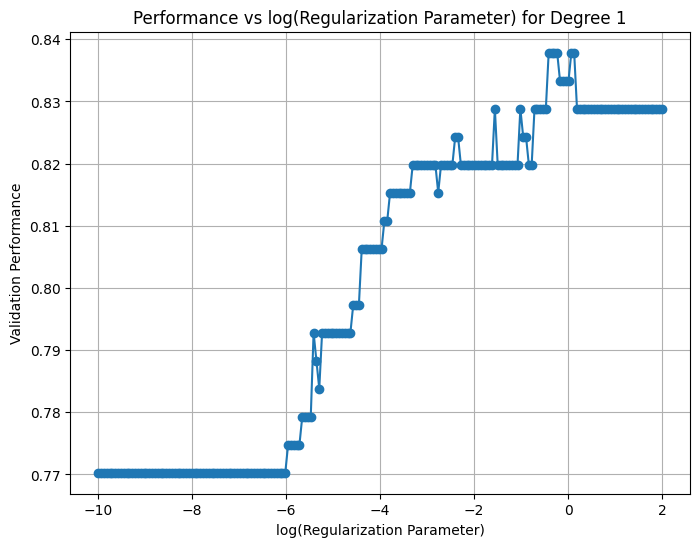

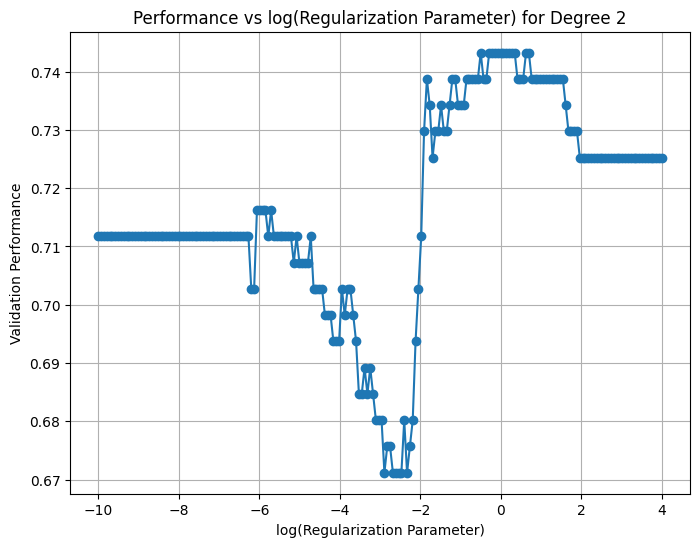

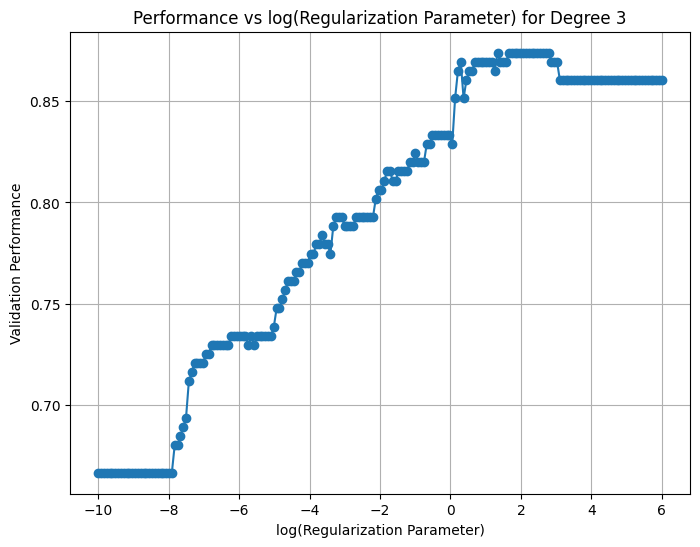

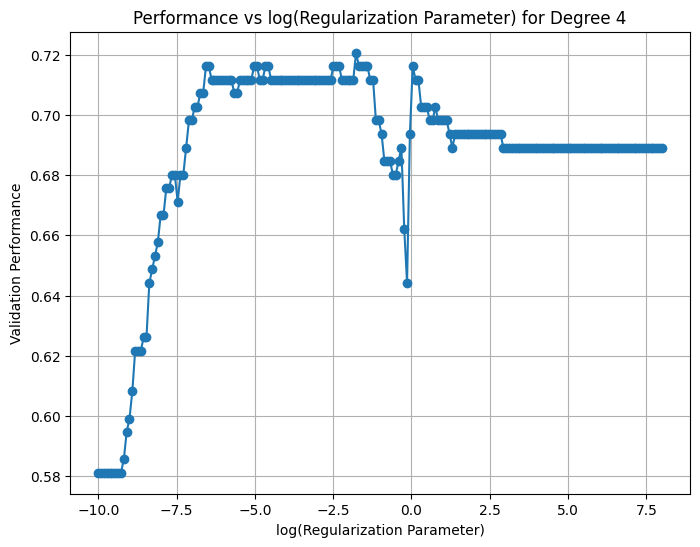

In [10]:
for exp_degree in [1, 2, 3, 4]:
    C_range = [math.exp(i) for i in np.linspace(-10, 2 * exp_degree, 200)]
    accuracy_per_C = []

    for C_param in C_range:
        poly_svm_model = SVC(kernel='poly', degree=exp_degree, C=C_param)
        poly_svm_model.fit(X_train_1, Y_train_1)
        predicted_values = poly_svm_model.predict(X_vali)
        accuracy_per_C.append(accuracy_score(Y_vali, predicted_values))

    plt.figure(figsize=(8, 6))
    plt.plot(np.log(C_range), accuracy_per_C, marker='o')
    plt.xlabel('log(Regularization Parameter)')
    plt.ylabel('Validation Performance')
    plt.title(f'Performance vs log(Regularization Parameter) for Degree {exp_degree}')
    plt.grid(True)
    plt.show()


(3)

In [11]:
best_svm_model = SVC(kernel='poly', degree=best_degree, C=best_C_value)
best_svm_model.fit(X_train_1, Y_train_1)

test_predictions = best_svm_model.predict(X_test)
final_accuracy = accuracy_score(Y_test, test_predictions)

final_accuracy


0.8848484848484849